In [1]:
import tensorflow as tf
model_cytoplasm = tf.keras.models.load_model('UNET_cytoplasm.h5')
model_condensate = tf.keras.models.load_model('UNET_condensate.h5')
import matplotlib.pyplot as plt

2024-06-12 15:49:05.812903: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-12 15:49:05.855682: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-12 15:49:06.028550: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-12 15:49:06.971699: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-06-12 15:49:07.896250: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/b

In [2]:
import numpy as np
import tifffile as tif

# Assuming you have test images in a directory, similar to how you handled training data
folder = '/media/hcleroy/experimental_data/Synphilin_Timelapse/'
test_image_paths = [folder+'Cell'+str(i)+'_ROI'+str(i)+'.tif' for i in range(1,9)]  # Add your test image paths here


In [3]:
# Preprocess test images
test_images = [tif.imread(path) for path in test_image_paths]
test_images = [tf.image.resize(img[25,12, :,:, np.newaxis], (256, 256)) for img in test_images]
#test_images = np.array([ img for imgs in test_images for img in imgs], dtype=np.float32)
test_images = np.array([ img for img in test_images], dtype=np.float32)
test_images /= 255.0  # Normalize pixel values to [0, 1]

In [4]:
# Make predictions
predictions_cytoplasm = model_cytoplasm.predict(test_images)
predictions_condensate = model_condensate.predict(np.log(test_images))


2024-06-12 15:49:12.801998: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 268435456 exceeds 10% of free system memory.
2024-06-12 15:49:13.003617: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 268435456 exceeds 10% of free system memory.


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


2024-06-12 15:49:16.379958: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 268435456 exceeds 10% of free system memory.
2024-06-12 15:49:16.574588: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 268435456 exceeds 10% of free system memory.


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


In [11]:
threshold = 0.5
cyt_mask = np.array([pred>threshold for pred in predictions_cytoplasm])

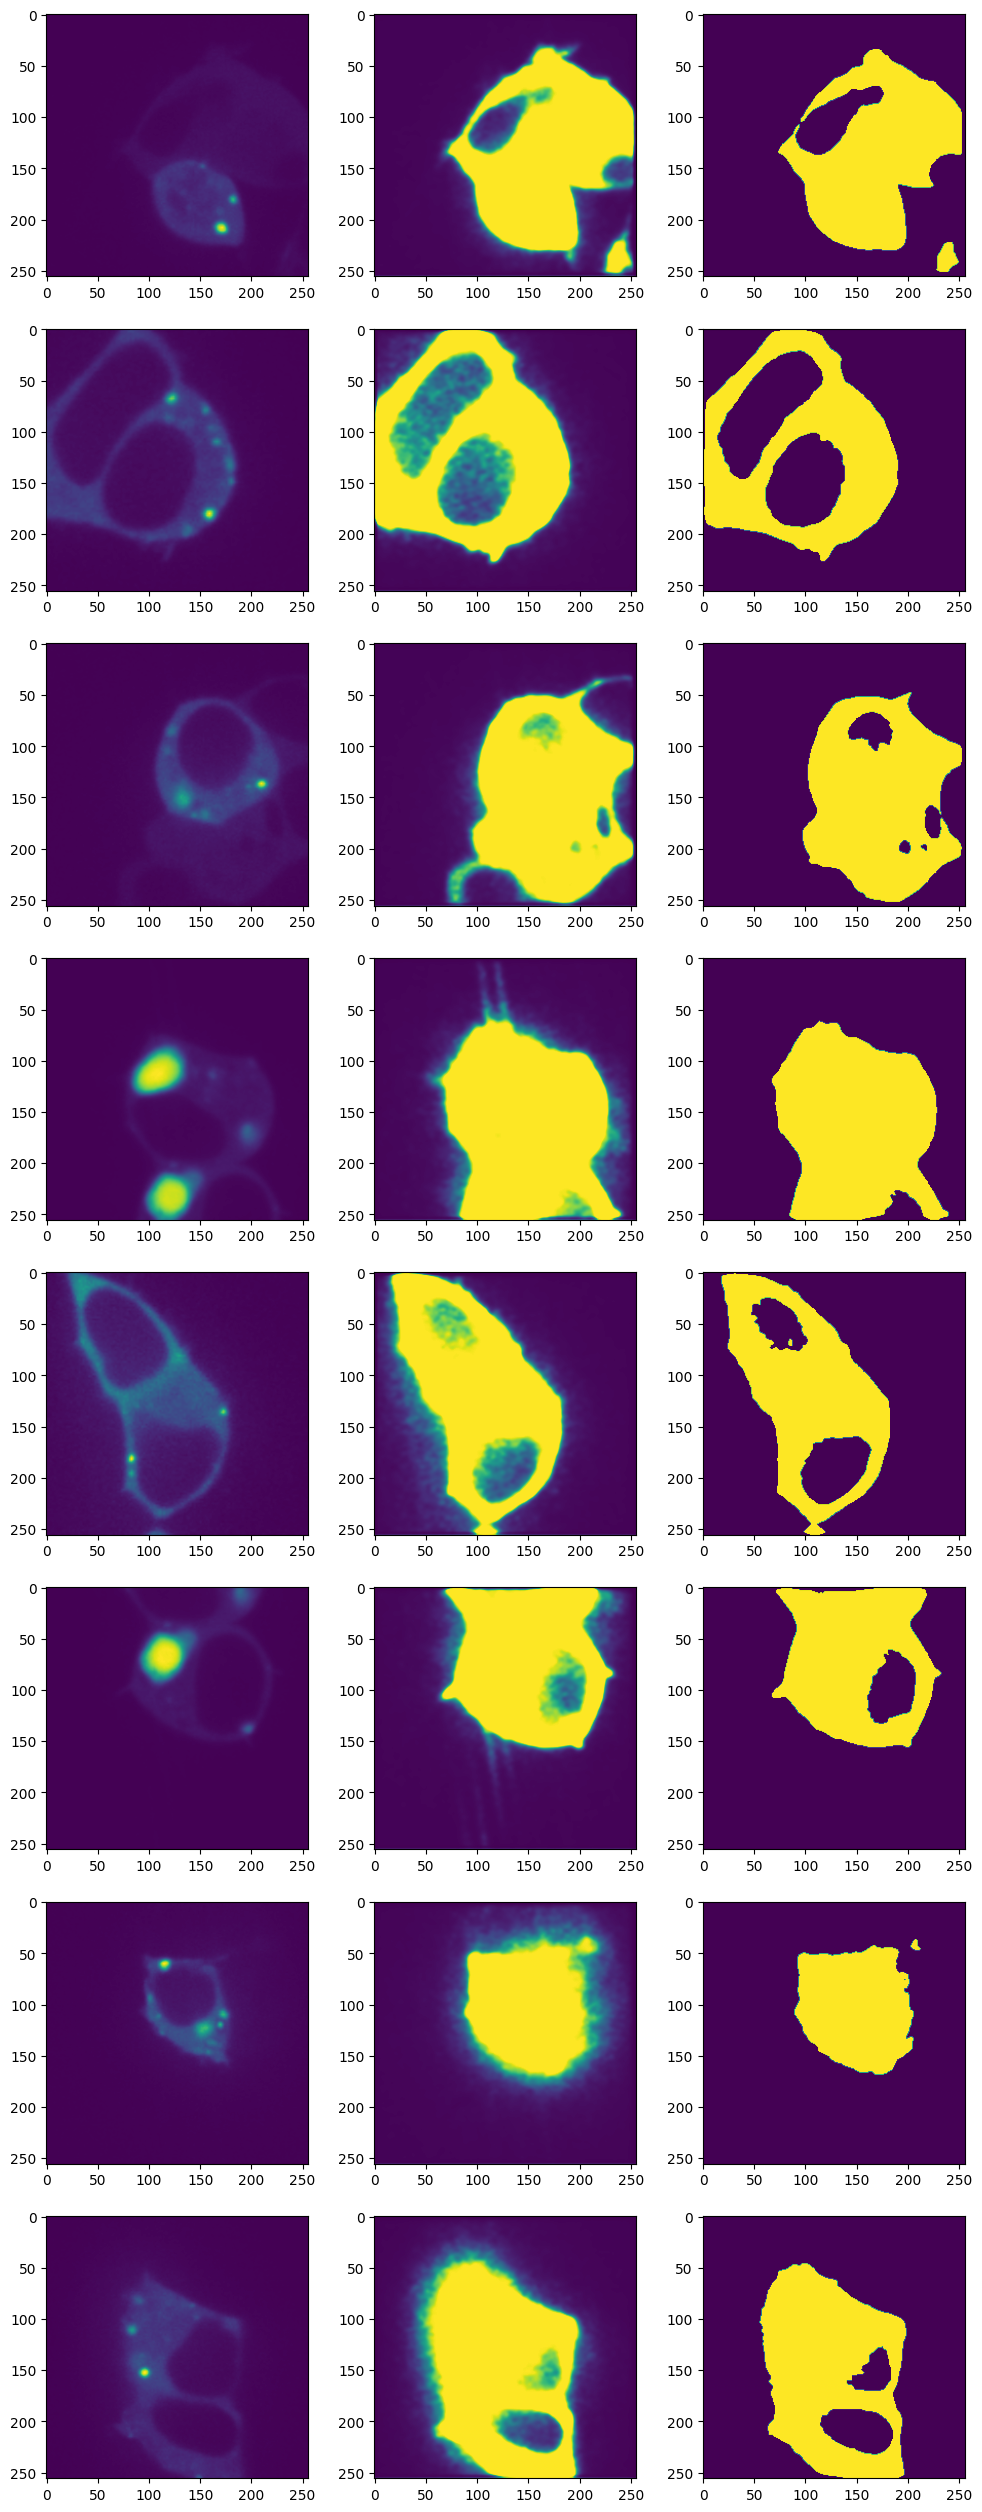

In [12]:
fig,ax = plt.subplots(ncols=3,nrows=8,figsize=(12,8*4))
for i in range(predictions_cytoplasm.shape[0]):
    ax[i,0].imshow(test_images[i])
    ax[i,1].imshow(predictions_cytoplasm[i][:,:])
    #ax[i,2].imshow(predictions_condensate[i][:,:])
    ax[i,2].imshow(cyt_mask[i])